In [1]:
!pip install pennylane nftopt qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 47.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 71.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 58.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 34.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.0 MB/s eta 0:00:00:00:01
 

In [188]:
import pennylane as qml
import math
import numpy as np
from scipy.linalg import block_diag
from scipy import optimize
# from nftopt import nakanishi_fujii_todo as nftmethod
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from scipy.linalg import expm, norm
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# defing parameters
n_qubits = 5
wires=[0,1,2,3,4]
depth = 10

In [5]:
dev = qml.device("default.qubit", wires = wires)

In [6]:
# Set parameters
delta = 1.0
Omega = 1.0
gamma = 1.0
Delta_t = 0.01

In [7]:
# Exact vector a
alpha = np.sqrt(2)/2*delta*Delta_t
beta = (1-gamma*Delta_t/2)

In [8]:
# Pauli operators
I = np.eye(2)
X = np.array([[0,1],[1,0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
Hadamard = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

In [9]:
# The non-Hermitian operator H

H0 = np.kron(I,1j*Hadamard)
H1 = np.kron(I,-Z)
H2 = np.kron((-1j * alpha * Hadamard + beta * I) / np.sqrt(alpha**2 + beta**2), I)
H3 = np.kron(-Z,I)
H4 = np.kron(X,X)
H5 = np.kron(X,-1j*Y)
H6 = np.kron(-1j*Y,X)
H7 = np.kron(-Y,Y)

In [43]:
# The non-Hermitian operator Q

I_4 = np.eye(4)

Q0 = I_4 + Delta_t*H0
Q1 = I_4 + Delta_t*H1
Q2 = I_4 + Delta_t*H2
Q3 = I_4 + Delta_t*H3
Q4 = I_4 + Delta_t*H4
Q5 = I_4 + Delta_t*H5
Q6 = I_4 + Delta_t*H6
Q7 = I_4 + Delta_t*H7
Q_i = np.array([Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7])

In [46]:
print(Q_i[0]*2)

[[2.+0.01414214j 0.+0.01414214j 0.+0.j         0.+0.j        ]
 [0.+0.01414214j 2.-0.01414214j 0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         2.+0.01414214j 0.+0.01414214j]
 [0.+0.j         0.+0.j         0.+0.01414214j 2.-0.01414214j]]


In [34]:
delta=1;
Omega=1;
gamma=1;
Delta_t=0.01;

alpha=np.sqrt(2)/2*delta*Delta_t;
beta=(1-gamma*Delta_t/2);
aa=[Delta_t*np.sqrt(2)/2*delta,Delta_t*gamma/4,np.sqrt(alpha**2+beta**2),Delta_t*gamma/4,Delta_t*gamma/4,Delta_t*gamma/4,Delta_t*gamma/4,Delta_t*gamma/4]
x=np.sqrt(aa);
norma=np.linalg.norm(x);
x=x/np.linalg.norm(x);
Appro_a =x

In [47]:
Q =0
for i in range(len(aa)):
    Q+= aa[i]*Q_i

In [91]:
# Multi-controlled unitary
Lambda_Q = np.asmatrix(block_diag(Q0, Q1, Q2, Q3, Q4, Q5, Q6, Q7))
print(Lambda_Q)

[[ 1.  +0.00707107j  0.  +0.00707107j  0.  +0.j         ...
   0.  +0.j          0.  +0.j          0.  +0.j        ]
 [ 0.  +0.00707107j  1.  -0.00707107j  0.  +0.j         ...
   0.  +0.j          0.  +0.j          0.  +0.j        ]
 [ 0.  +0.j          0.  +0.j          1.  +0.00707107j ...
   0.  +0.j          0.  +0.j          0.  +0.j        ]
 ...
 [ 0.  +0.j          0.  +0.j          0.  +0.j         ...
   1.  +0.j         -0.01+0.j          0.  +0.j        ]
 [ 0.  +0.j          0.  +0.j          0.  +0.j         ...
  -0.01+0.j          1.  +0.j          0.  +0.j        ]
 [ 0.  +0.j          0.  +0.j          0.  +0.j         ...
   0.  +0.j          0.  +0.j          1.  +0.j        ]]


In [15]:
# @qml.qnode(dev,diff_method="backprop")
def circuit(weights):
  # since depth 4 was used
  # qml.state() applies Ua to Ini State, which gives Appro_a
  return Uq_theta(weights)

In [16]:
def accuracy(labels, predictions):
  state0 = qml.math.dm_from_state_vector(labels)
  state1 = qml.math.dm_from_state_vector(predictions)
  return qml.math.fidelity(state0, state1)

In [17]:
dev = qml.device("default.qubit",wires=wires)
dev

<default.qubit device (wires=5) at 0x7f20b3c93ac0>

In [ ]:
def variational_classifier(weights):
    # weights are thetas
    # np.real(Ua|0>)
    return circuit(weights)

In [ ]:
def g_beta_loss(Uq_theta):

  UqFunction = np.abs(1-1/(32**2) * np.trace(np.matmul(Uq_theta.H,Lambda_Q))**2)
  return UqFunction


In [ ]:
def cost(weights):
    # X is our preparation state
    Uq_theta = variational_classifier(weights)
    return g_beta_loss(Uq_theta)

In [ ]:
#UqLay
def ansatz_layer(layer_weights,depth=depth, n_qubits=n_qubits):
    cntr = 0
    for dep in range(depth):
        for wire in range(n_qubits):
          qml.RZ(layer_weights[cntr+wire], wires = wire)
          qml.RY(layer_weights[cntr+wire+n_qubits], wires = wire)
          qml.RZ(layer_weights[cntr+wire+2*n_qubits], wires = wire)
        cntr += 15
        qml.CRY(layer_weights[cntr], wires = [0,1])
        qml.CRY(layer_weights[cntr+1], wires = [2,3])
        qml.CRY(layer_weights[cntr+2], wires = [1,2])
        qml.CRY(layer_weights[cntr+3], wires = [3,4])
        qml.CRY(layer_weights[cntr+4], wires = [4,0])
        cntr+=5


def ansatz_layer_qiskit(layer_weights,depth=depth, n_qubits=n_qubits):
    cntr = 0
    qc=QuantumCircuit(n_qubits)
    for dep in range(depth):
        for wire in range(n_qubits):
          qc.rz(layer_weights[cntr+wire],  wire)
          qc.ry(layer_weights[cntr+wire+n_qubits], wire)
          qc.rz(layer_weights[cntr+wire+(2*n_qubits)], wire)
        cntr += (3*n_qubits)

        qc.cry(layer_weights[cntr],  0,1)
        qc.cry(layer_weights[cntr+1],1,2)
        qc.cry(layer_weights[cntr+2], 2,3)
        qc.cry(layer_weights[cntr+3], 3,4)
        qc.cry(layer_weights[cntr+4],4,0)
        cntr+=5
    return qc


In [ ]:
#no of params

param_num = depth*(3*n_qubits + 5)
weights = 4*np.pi*np.random.rand(param_num)
Uq_theta = qml.matrix(ansatz_layer, wire_order=wires)
# mat= qml.matrix(ansatz_layer, wire_order=wires)
# mat(weights)

In [ ]:
result= optimize.differential_evolution(cost,weights, method=nftmethod, options={'maxfev':10024})

In [1]:
Lambda_Q=Uq_theta(result.x)

NameError: name 'Uq_theta' is not defined

In [ ]:
actual= np.array([1.57079733591099,1.11359502220427,-1.00669506549188,1.57250085376222,1.02409557893575,1.57079679146982,-4.15665383066625e-07,7.14719394747723e-07,-1.56724773824862,-0.000614013929320578,0.719876509408139,0.997019010625927,1.34266643602999,-0.0566423964091659,-0.198803606107426,4.12402219276197e-07,2.36004519680925,3.14159355260020,2.59447240543746,1.64995941832298,6.57167736894368e-06,-0.204426436552582,0.718822906024339,0.0555381143566316,1.22077655054078,1.47012607039025,1.24568787397716,3.16470575286539e-07,-1.41523650969969,-1.12443160971972e-05,9.56247275530149e-07,0.225481974967938,-0.370580804204376,0.946569757824895,1.09582358297068,2.60944296625233e-06,2.83005612005484,1.80281320871742e-07,3.05465559140493,-4.64438225630518,7.18492141641211e-06,1.01649349032213,0.397054959402862,0.891331221113881,1.42949809347604,0.668756803928736,0.405699396560314,6.86530483904170e-07,-1.45873202753671,0.881902656523558,-7.67979744447070e-06,1.27651005073939,0.436796768649163,-0.113451673777618,0.331706689945956,-6.75014714232562e-08,3.47789082953119,2.29543748987603e-07,9.29655114196422e-05,2.98711003906548,9.74888797984682e-07,0.485187254668692,0.701984759105152,0.153510737915355,2.00174613736982,0.785610475143101,0.854479713729773,-3.16770017244822e-07,-0.713575292704574,0.888168349793261,1.86164167761867e-05,0.777344522869591,0.911026411259294,2.19049922735768,0.200707954646294,3.79204627326816e-06,1.11990000439054,6.43694492806998e-07,2.86672143506094,1.46041918491953,-0.00117640233280669,0.656328627882187,1.11052625891696,-2.05453019579337,-1.03561090101006,-0.0385576531861913,0.679512334289457,3.49981514234440e-07,0.616115790485040,1.96671866486657,0.00118298541680430,0.0959655335563301,0.806757491714172,1.37550324222698,1.28170054112367,-2.72146569950459e-06,3.79107538088120,3.14159049070168,-2.97839814331328,1.13499009065223,0.000164963327193107,0.708402055065732,-0.508085764996444,-1.10338478220173,-0.145930490596749,-0.0833709612525789,-0.0769024890951715,1.50058572229758e-06,0.457028608006845,-1.11624944106986,-0.000186427950202115,0.0367794149738548,0.100719990203789,1.66879218349985,0.690908540854943,8.00351219085385e-07,2.71638878661625,-2.03797906878869e-06,3.42407854715108,3.15066337137045,-7.89579355264028e-06,0.703851652884238,-0.351384547074919,0.00653016763185684,0.460006933077785,0.629776613346937,-0.0257066355231561,9.31788928688248e-07,0.988893076829831,-1.39138216555928,1.92133478626211e-05,0.671068569899600,0.290473096238051,-0.00345094992316553,0.557939537638457,7.20303829054454e-07,1.16963667314765,2.55028707329980e-06,3.39355155799844,1.36939312951080,0.000113468659633244,0.919770045772259,1.57208852755251,0.704740614345514,0.00544616504091159,0.270036060251177,-0.104235441502291,-8.09610636842791e-07,0.414588049726535,-1.40164069712475,-0.000106712713222192,0.0118054501508154,1.25141779531807,2.27104250842408,1.38569367538623,-9.90914580337425e-07,-2.15134001562986,-4.20518401123418e-06,2.79940777684330,0.979933399204776,-4.87895462973966e-05,0.646379924586987,1.12353895240239,0.100688292830383,-0.00377433577073084,0.217036836300740,-0.0912333819206649,1.57236409935787e-06,0.612676788035841,-0.693935274916199,4.30522750195906e-05,0.676505471187040,1.53939824819962,0.767155351536031,-0.00465164670062250,1.49806357059613e-07,5.20294323949608,3.87142341824550e-06,2.91884011869610,-1.86140952130424,0.101352529892813,0.272942450384811,0.809437810305190,-1.03696350482872,-0.531720967877519,1.57081255681975,-0.0827630009432063,1.31798944307755e-06,-2.48052344311936,1.74464906123692,1.57078935628697,0.989435035630191,0.119610052783714,-1.74740155497789,1.47571606248112,-2.56410174824011e-07,4.23516700586156,-6.58014685665469e-07,1.57398823652499,-8.33531232142770e-06])

In [ ]:
Uq_theta(actual)[0]

array([ 0.35525202-0.38432711j, -0.13376795+0.24788094j,
       -0.00093155-0.02828442j, -0.35012158+0.08152903j,
       -0.00076479-0.00401041j,  0.00729262-0.00594939j,
       -0.00782965-0.00782849j, -0.00197026-0.00524867j,
        0.03776296+0.00342262j,  0.025089  +0.01513018j,
        0.00967501-0.00523224j, -0.00515973+0.02140832j,
        0.04671689+0.03053072j, -0.12738565+0.00092946j,
        0.10966839-0.0969609j , -0.04289459+0.02379246j,
       -0.23169368-0.16927703j, -0.11106961-0.02621189j,
       -0.00134295+0.51218331j, -0.12024863+0.24196631j,
       -0.00258283+0.004838j  ,  0.00293826-0.00370314j,
        0.00519751+0.00106249j,  0.0013665 +0.00397458j,
       -0.02220288+0.00597553j, -0.00441416-0.00652423j,
        0.00175369-0.01095157j, -0.00384448+0.01926277j,
        0.00630222+0.11318483j, -0.03610057+0.05099095j,
       -0.11727479-0.06472517j, -0.05410269-0.02925295j])

### Post U_e obtained, Simulations Part

In [178]:
zero = np.array([1,0])
I = np.identity(2)
X = np.array([[0,1],[1,0]])

In [179]:
Vec_Rho_Ini = np.kron(zero, zero)
# Lambda_Q@np.kron(Appro_a, Rho_t)

In [180]:
Hat_M = np.kron(I,X)

In [181]:
# Strategy B
I_three = np.asmatrix(np.kron(zero, np.kron(zero, zero))).T
Widetilde_M = np.kron(I_three@ I_three.H, Hat_M)
Widetilde_I = np.kron(I_three@ I_three.H, np.kron(I,I))

# Bell state
Bell_state = np.asmatrix(np.sqrt(2)*np.array([1,0,0,1])).T

In [182]:

Number = 500
Delta_t = 0.01

Simu_Expectation = np.zeros(Number)
Exact_Expectation = np.zeros(Number)
First_Expectation = np.zeros(Number)
Pro = np.zeros(Number)
ExactTrace = np.zeros(Number)
Iteration=[]

In [183]:

Rho_t = Vec_Rho_Ini
Exact_Rho_t = Vec_Rho_Ini
First_Rho_t = Vec_Rho_Ini
print(Rho_t)

[1 0 0 0]


In [184]:
H=-delta/2*Z-Omega/2*X;
L=np.sqrt(gamma)/2*(X-1j*Y);

In [185]:
Hat_L1=np.kron(np.conj(L),L)-1/2*np.kron(I,(L.T)@L)-1/2*np.kron((L.T)@np.conj(L),I);
Hat_H=-1j*(np.kron(I,H)-np.kron((H.T),I))+Hat_L1;
First_operator=np.kron(I,I)+Hat_H*Delta_t;
Error_HQ=First_operator-Q

In [186]:
# getting a
#based on the formulation of the paper

Ua_theta_opt = np.matrix([[ 0.09732194+0.j,  0.09515274+0.j, -0.84231131+0.j,
         0.2145027 +0.j,  0.33979514+0.j, -0.05761081+0.j,
         0.32089011+0.j, -0.06499571+0.j],
       [ 0.06499144+0.j, -0.28490135+0.j, -0.20239675+0.j,
        -0.21907834+0.j,  0.41394431+0.j, -0.19986512+0.j,
        -0.78110412+0.j,  0.06502277+0.j],
       [ 0.98391304+0.j, -0.0601953 +0.j,  0.11899291+0.j,
        -0.05525732+0.j, -0.02790954+0.j, -0.04651244+0.j,
         0.0825758 +0.j, -0.03630224+0.j],
       [ 0.06497902+0.j,  0.25415947+0.j, -0.43544085+0.j,
        -0.12950159+0.j, -0.7736793 +0.j, -0.01872677+0.j,
        -0.34877471+0.j, -0.06501651+0.j],
       [ 0.06501651+0.j, -0.34877471+0.j, -0.01872677+0.j,
         0.7736793 +0.j, -0.12950159+0.j,  0.43544085+0.j,
        -0.25415947+0.j,  0.06497902+0.j],
       [-0.03630224+0.j, -0.0825758 +0.j,  0.04651244+0.j,
        -0.02790954+0.j,  0.05525732+0.j,  0.11899291+0.j,
        -0.0601953 +0.j, -0.98391304+0.j],
       [ 0.06502277+0.j,  0.78110412+0.j,  0.19986512+0.j,
         0.41394431+0.j,  0.21907834+0.j, -0.20239675+0.j,
        -0.28490135+0.j, -0.06499144+0.j],
       [ 0.06499571+0.j,  0.32089011+0.j, -0.05761081+0.j,
        -0.33979514+0.j,  0.2145027 +0.j,  0.84231131+0.j,
        -0.09515274+0.j,  0.09732194+0.j]])

In [187]:
Rho_t = Vec_Rho_Ini
Exact_Rho_t = Vec_Rho_Ini
First_Rho_t = Vec_Rho_Ini
for i in range(Number):
    Iteration.append((i+1)*Delta_t)

    Rho_t = Lambda_Q@(np.kron(Appro_a, Rho_t))
    Rho_t = np.kron(Ua_theta_opt.H,np.kron(I,I)) @ Rho_t.T
    # Measurement
    PI = I_three@ I_three.H
    PI = np.kron(PI, np.kron(I,I))
    Rho_t = PI@Rho_t
    Pro[i]= (np.linalg.norm(Rho_t)**2)
    Rho_t = Rho_t/np.linalg.norm(Rho_t)
    Rho_t = Rho_t[:4].A1

    Simu_Trace = np.real(Bell_state.H @ Rho_t)
    Simu_Expectation_M = np.real(np.dot(np.dot(Bell_state.H, Hat_M), Rho_t))
    Simu_Expectation[i] = np.real(Simu_Expectation_M)/Simu_Trace

    First_Rho_t = np.dot(First_operator, First_Rho_t)
    First_Rho_t = First_Rho_t/norm(First_Rho_t)

    First_Trace = np.real(np.dot(Bell_state.H, First_Rho_t))
    First_Exception_M = np.real(np.dot(np.dot(Bell_state.H, Hat_M),First_Rho_t))
    First_Expectation[i] = First_Exception_M/First_Trace

    Exact_Rho_t = np.dot(expm(Hat_H*Delta_t),Exact_Rho_t)
    ExactTrace[i] = np.sqrt(2)*np.real(Bell_state.H @ Exact_Rho_t)
    Exact_Rho_t = Exact_Rho_t/norm(Exact_Rho_t)
    Exact_Trace = np.real(np.dot(Bell_state.H, Exact_Rho_t))
    Exact_Expectation_M = np.real(np.dot(np.dot(Bell_state.H,Hat_M),Exact_Rho_t))
    Exact_Expectation[i] = Exact_Expectation_M/Exact_Trace

    ExactTrace[i] = (np.real(np.dot(Bell_state.H, Exact_Rho_t)) - 1) / 2

/tmp/ipykernel_7552/12199506.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Simu_Expectation[i] = np.real(Simu_Expectation_M)/Simu_Trace
/tmp/ipykernel_7552/12199506.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  First_Expectation[i] = First_Exception_M/First_Trace
/tmp/ipykernel_7552/12199506.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ExactTrace[i] = np.sqrt(2)*np.real(Bell_state.H @ Exact_Rho_t)
/tmp/ipykernel_7552/12199506.py:33: Deprecatio

In [189]:
Rho_t

array([9.98451353e-01+4.21144680e-03j, 6.98042742e-04+2.87531637e-02j,
       6.95298313e-04-2.37258788e-02j, 4.10673458e-02-1.82289214e-06j])

In [ ]:
Plot exactexpec, simuexpec, First_Expectation

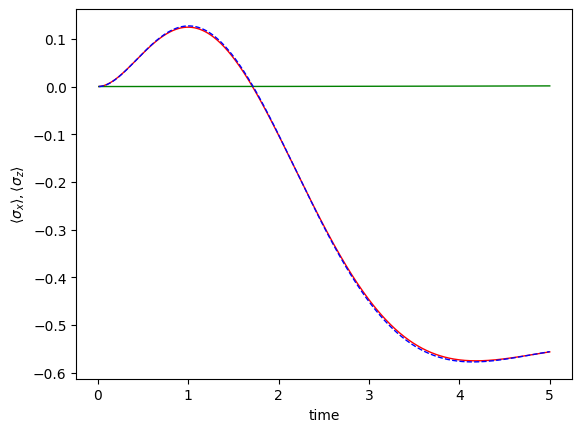

In [191]:
STEP=1
plt.plot(Iteration[::STEP], Exact_Expectation[::STEP], 'r-', linewidth=1, markersize=4, markeredgecolor='r', markerfacecolor='r')
plt.plot(Iteration[::STEP], Simu_Expectation[::STEP], 'g', linewidth=1, markersize=4, markeredgecolor='g', markerfacecolor='g')
plt.plot(Iteration[::STEP], First_Expectation[::STEP], 'b--', linewidth=1, markersize=4, markeredgecolor='b', markerfacecolor='b')
plt.ylabel(r'$\langle\sigma_x\rangle,\langle\sigma_z\rangle$')
plt.xlabel('time')
plt.show()